<a href="https://colab.research.google.com/github/vishalraj1202/-vr-webdev/blob/main/no_show_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Import libraries & Load dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,accuracy_score

df = pd.read_csv('/content/drive/MyDrive/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Clean Column Names


In [ ]:
df.columns = df.columns.str.strip().str.replace('-', '_').str.replace(' ', '_')

Basic Overview

In [ ]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df['No_show'].value_counts())

(110527, 14)
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int

Date Conversion & Feature Creation

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df = df[df['WaitingDays'] >= 0]

Drop Unnecessary Columns

In [ ]:
df = df.drop(['PatientId', 'AppointmentID'], axis=1)

Exploratory Data Analysis (EDA)

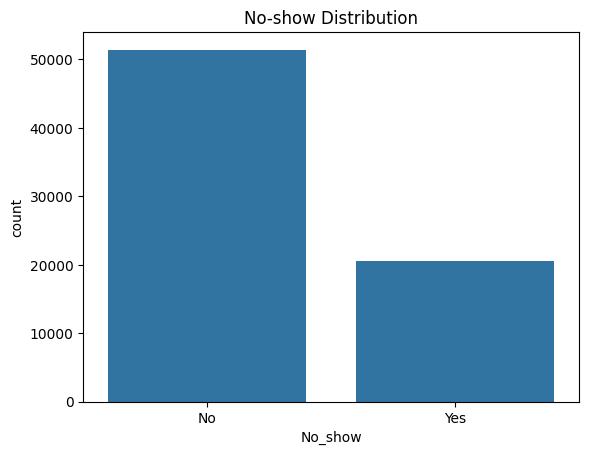

No_show
No     0.71481
Yes    0.28519
Name: proportion, dtype: float64


In [ ]:
# Target variable count
sns.countplot(x='No_show', data=df)
plt.title('No-show Distribution')
plt.show()
print(df['No_show'].value_counts(normalize=True))

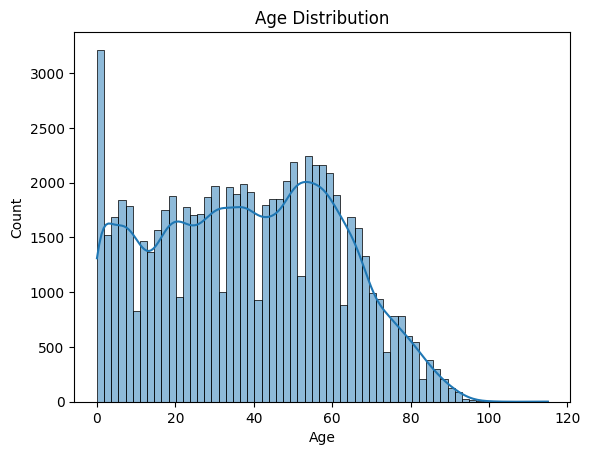

In [ ]:
# Age Distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

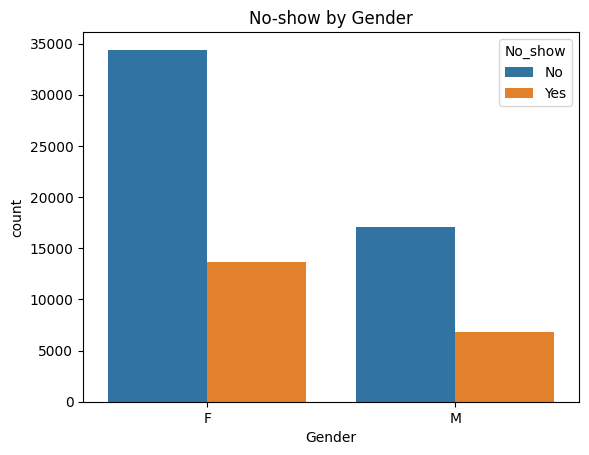

In [ ]:
# Gender vs No-show
sns.countplot(x='Gender', hue='No_show', data=df)
plt.title('No-show by Gender')
plt.show()

In [ ]:
# Add AppointmentDayOfWeek
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()

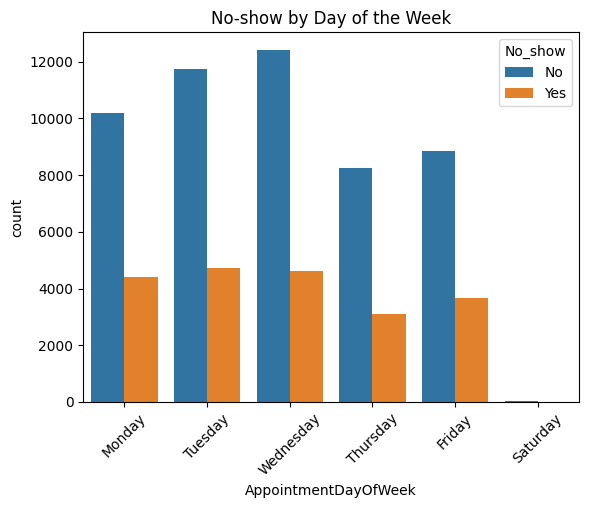

In [ ]:
# Weekday vs No-show
sns.countplot(x='AppointmentDayOfWeek', hue='No_show', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks(rotation=45)
plt.title('No-show by Day of the Week')
plt.show()


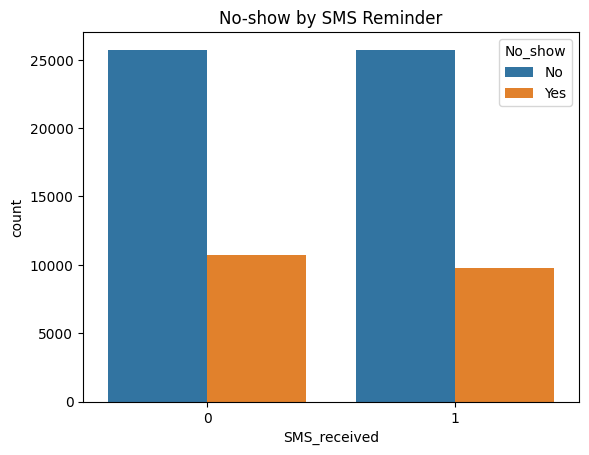

In [ ]:
# SMS Received vs No-show
sns.countplot(x='SMS_received', hue='No_show', data=df)
plt.title('No-show by SMS Reminder')
plt.show()

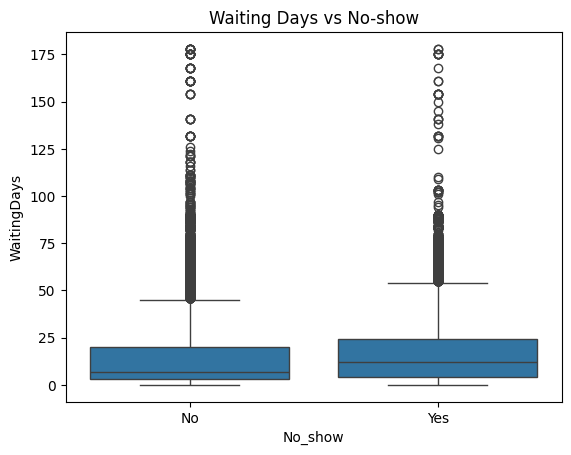

In [ ]:
# WaitingDays vs No-show
sns.boxplot(x='No_show', y='WaitingDays', data=df)
plt.title('Waiting Days vs No-show')
plt.show()

Statistical Analysis

In [ ]:
print("Skewness of Age:", df['Age'].skew())
print("Kurtosis of Age:", df['Age'].kurt())

Skewness of Age: 0.06012967725792768
Kurtosis of Age: -0.9504421396553218


Feature Encoding

In [ ]:
# Encode target variable
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood', 'AppointmentDayOfWeek'], drop_first=True)

# Drop date columns
df = df.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

Correlation Heatmaps

In [ ]:
all_possible_cols = [
    'Age',
    'Diabetes',
    'Alcoholism',
    'SMS_received',
    'Hipertension',
    'Scholarship',
    'WaitingDays',
    'No_show'
]

# Step 2: Keep only the columns that actually exist in the DataFrame
cols_to_plot = [col for col in all_possible_cols if col in df.columns]

# Step 3: Compute correlation matrix
corr = df[cols_to_plot].corr()

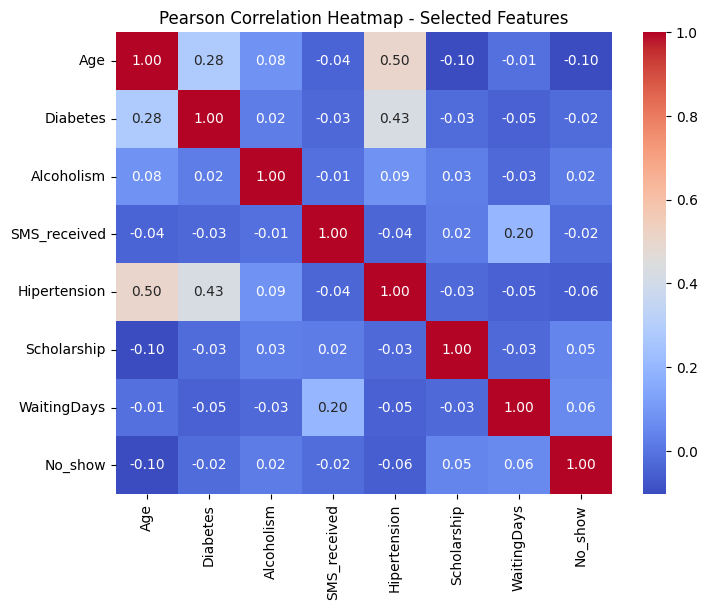

In [ ]:
# PEARSON HEATMAP
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap - Selected Features")
plt.show()

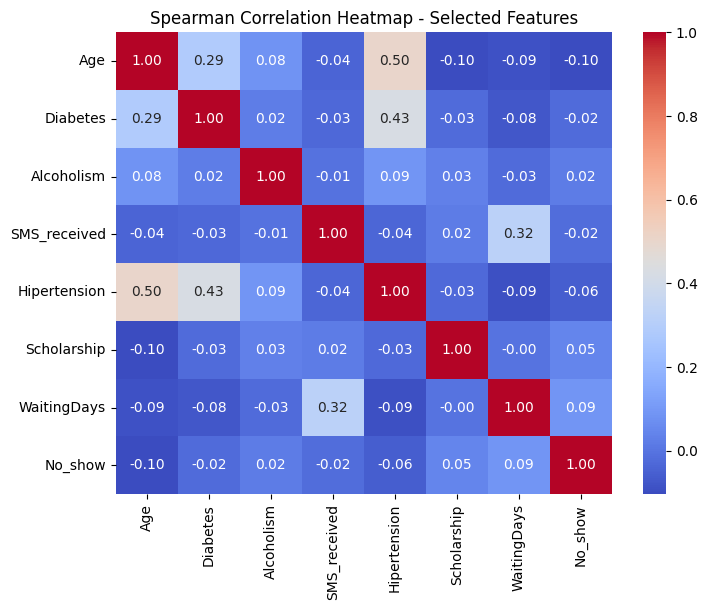

In [ ]:
# SPEARMAN HEATMAP
corr_spearman = df[cols_to_plot].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap - Selected Features")
plt.show()

Train-Test Split

In [ ]:
X = df.drop('No_show', axis=1)
y = df['No_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Logistic Regression

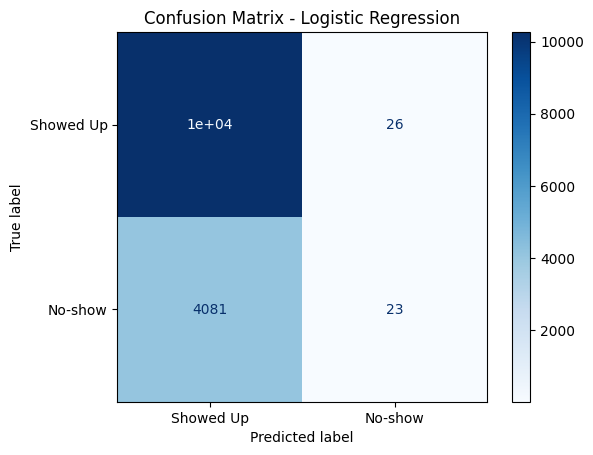

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10288
           1       0.47      0.01      0.01      4104

    accuracy                           0.71     14392
   macro avg       0.59      0.50      0.42     14392
weighted avg       0.65      0.71      0.60     14392



In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Showed Up", "No-show"])
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Random Forest Classifier

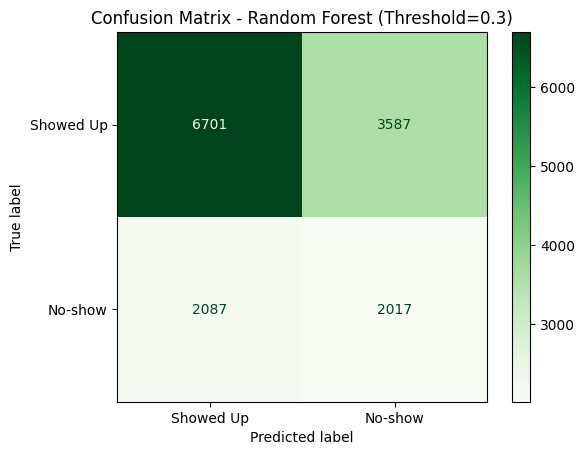

Classification Report - Random Forest (Threshold=0.3)
              precision    recall  f1-score   support

           0       0.76      0.65      0.70     10288
           1       0.36      0.49      0.42      4104

    accuracy                           0.61     14392
   macro avg       0.56      0.57      0.56     14392
weighted avg       0.65      0.61      0.62     14392



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_probs_rf = rf.predict_proba(X_test)[:, 1]

y_pred_rf = (y_probs_rf > 0.3).astype(int)

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Showed Up", "No-show"])
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest (Threshold=0.3)")
plt.show()

print("Classification Report - Random Forest (Threshold=0.3)")
print(classification_report(y_test, y_pred_rf))


Feature Importance (Random Forest)

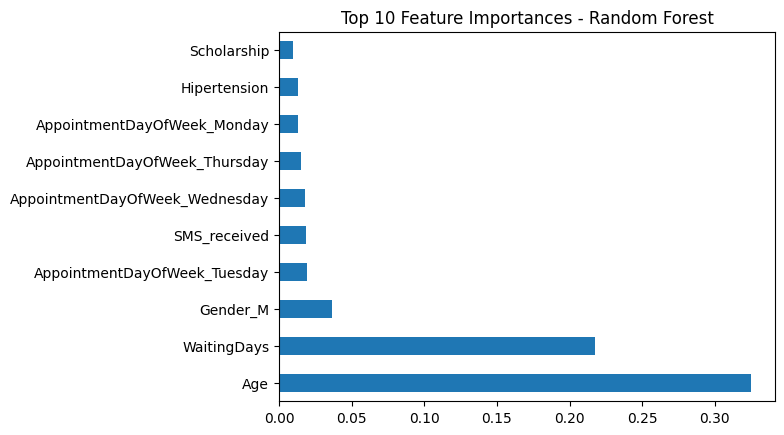

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()